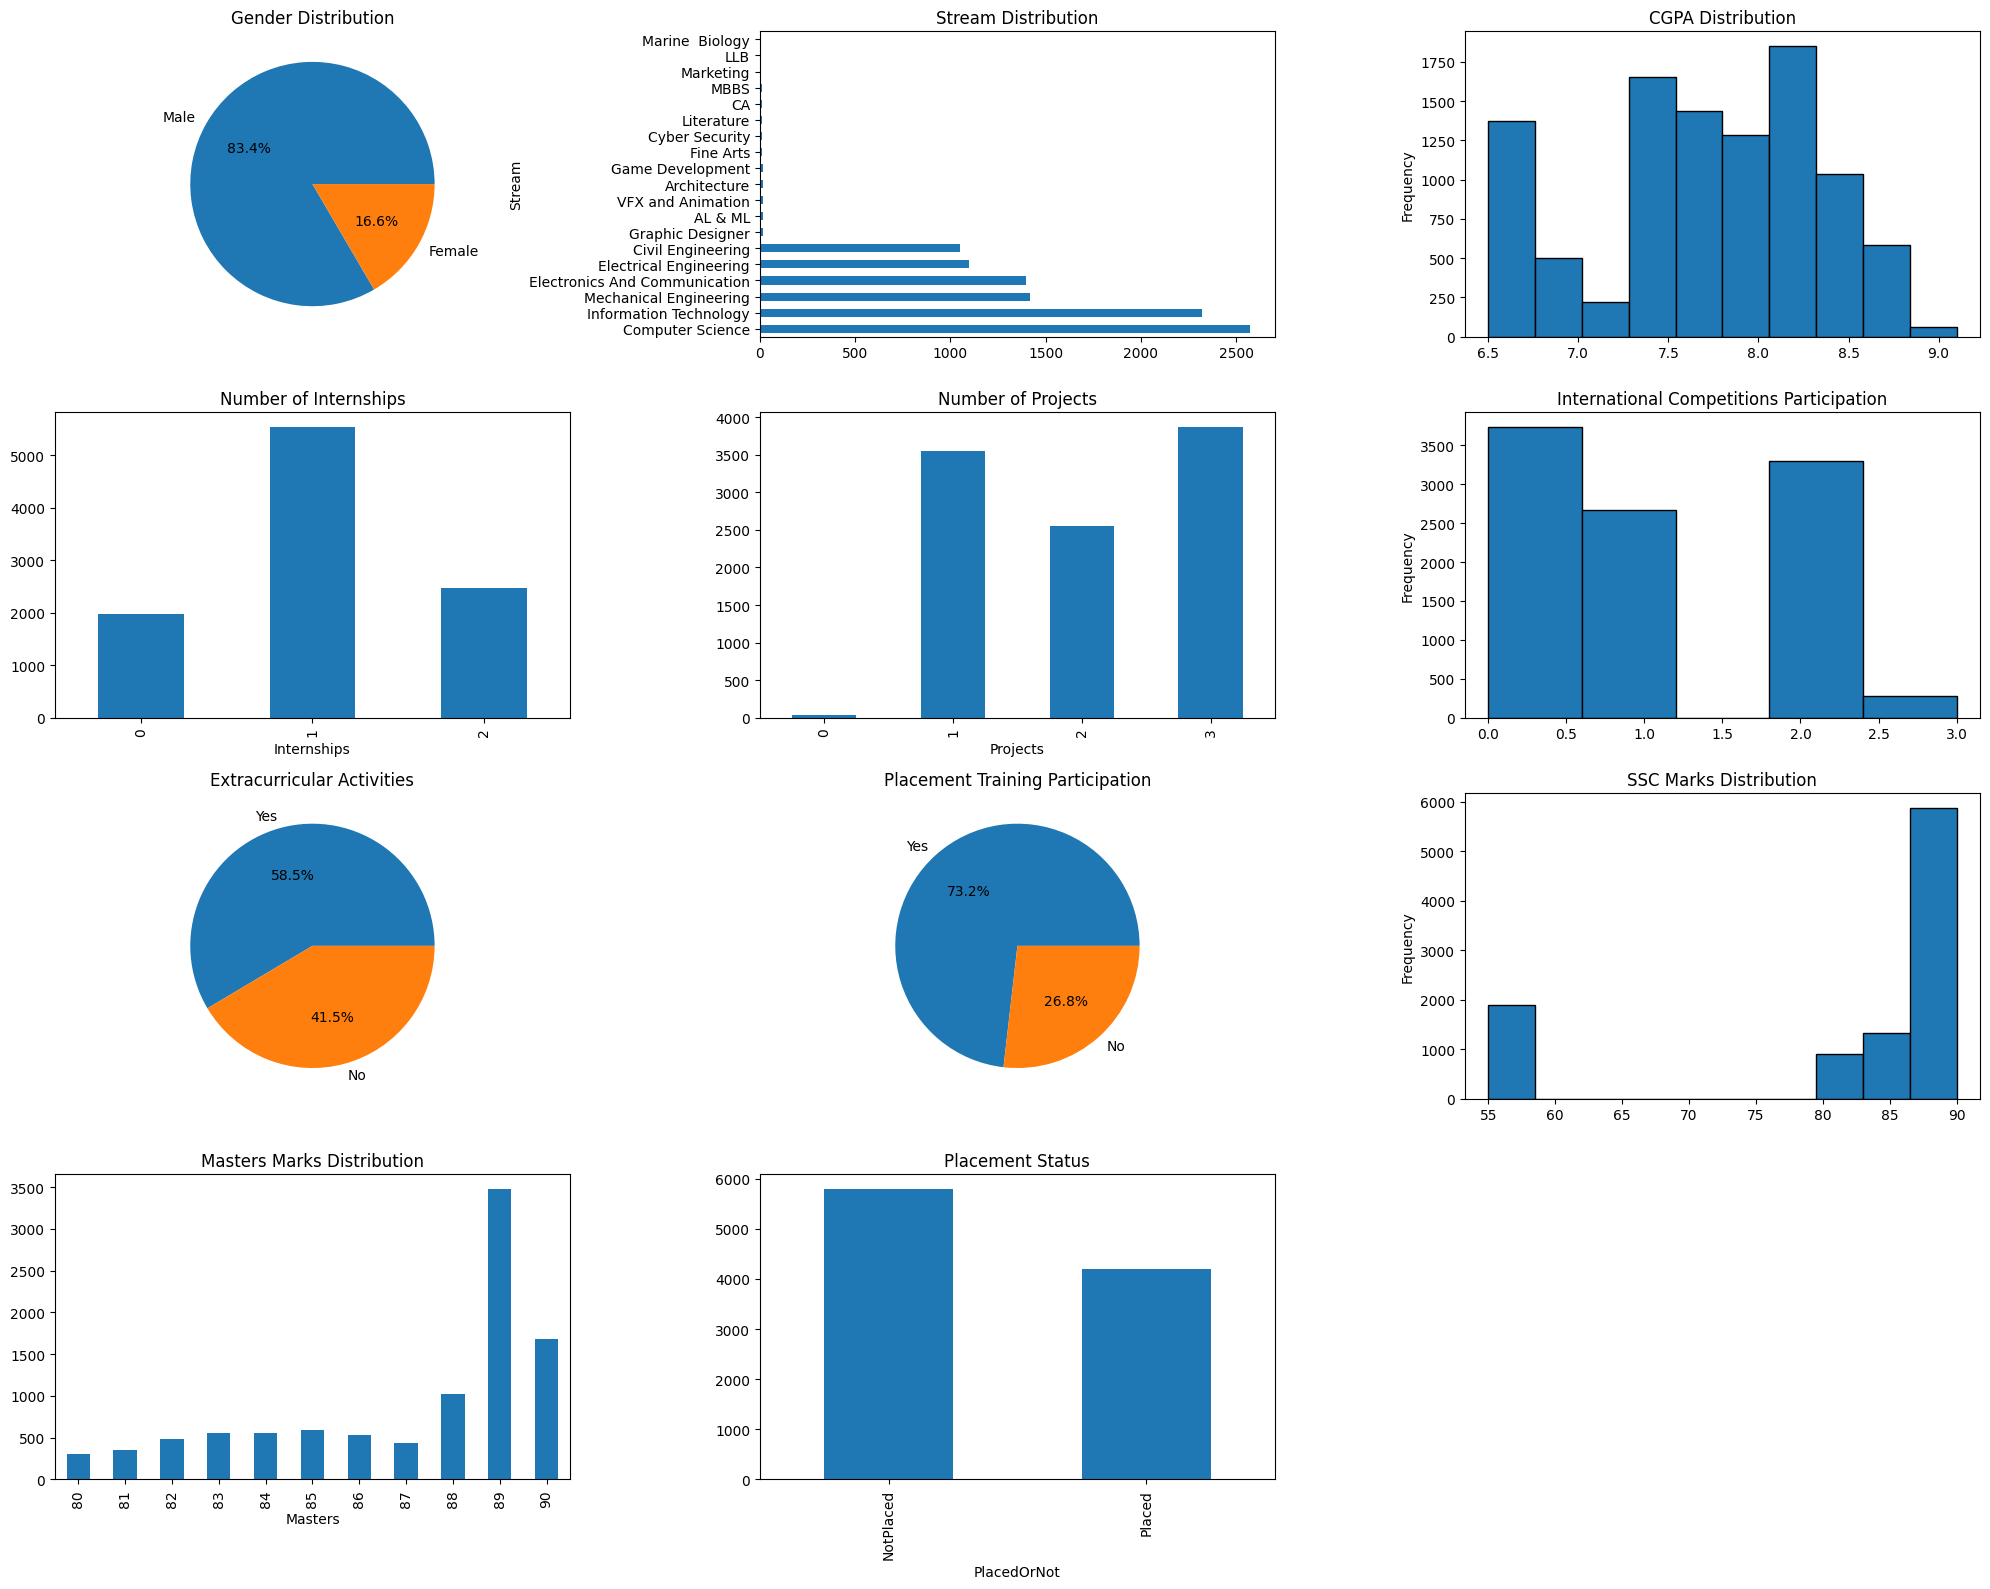

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('placementdata1.csv')

# Set up subplots (4 rows x 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
axes = axes.flatten()

# 1. Gender (Pie chart)
df['Gender'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', ax=axes[0],
    title='Gender Distribution', ylabel=''
)

# 2. Stream (Horizontal bar chart)
df['Stream'].value_counts().plot(
    kind='barh', ax=axes[1], title='Stream Distribution'
)

# 3. CGPA (Histogram)
df['CGPA'].plot(
    kind='hist', bins=10, ax=axes[2], edgecolor='black',
    title='CGPA Distribution'
)

# 4. Internships (Bar chart)
df['Internships'].value_counts().sort_index().plot(
    kind='bar', ax=axes[3], title='Number of Internships'
)

# 5. Projects (Bar chart)
df['Projects'].value_counts().sort_index().plot(
    kind='bar', ax=axes[4], title='Number of Projects'
)

# 6. International Competitions (Histogram)
df['International_Competitions'].plot(
    kind='hist', bins=5, ax=axes[5], edgecolor='black',
    title='International Competitions Participation'
)

# 7. Extracurricular Activities (Pie chart)
df['Extracurricular_Activities'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', ax=axes[6],
    title='Extracurricular Activities', ylabel=''
)

# 8. Placement Training (Pie chart)
df['PlacementTraining'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', ax=axes[7],
    title='Placement Training Participation', ylabel=''
)

# 9. SSC Marks (Histogram)
df['SSC_Marks'].plot(
    kind='hist', bins=10, ax=axes[8], edgecolor='black',
    title='SSC Marks Distribution'
)

# 10. Masters (Bar chart)
df['Masters'].value_counts().sort_index().plot(
    kind='bar', ax=axes[9], title='Masters Marks Distribution'
)

# 11. Placement Status (Bar chart)
df['PlacedOrNot'].value_counts().plot(
    kind='bar', ax=axes[10], title='Placement Status'
)

# Hide unused subplot
axes[11].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
import joblib
from tkinter import *
import tkinter.font as font

warnings.filterwarnings('ignore')

# --- Load & Prepare Data ---
data = pd.read_csv('placementdata1.csv')

# Encode Gender
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Encode Stream
stream_mapping = {stream: i for i, stream in enumerate(data['Stream'].unique())}
data['Stream'] = data['Stream'].map(stream_mapping)

# Encode Extracurricular_Activities
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# Encode PlacementTraining
data['PlacementTraining'] = data['PlacementTraining'].map({'Yes': 1, 'No': 0})

# Encode PlacedOrNot (Target)
data['PlacedOrNot'] = data['PlacedOrNot'].map({'Placed': 1, 'NotPlaced': 0})

# --- SWAP CGPA with SSC Marks ---
features = ['Age', 'Gender', 'Stream', 'SSC_Marks', 'Internships', 'Projects',
            'International_Competitions', 'Extracurricular_Activities',
            'PlacementTraining', 'CGPA', 'Masters']
X = data[features]
y = data['PlacedOrNot']

# Train Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X, y)

# Save model & mappings
joblib.dump(model, 'model_placement_all.pkl')
joblib.dump(stream_mapping, 'stream_mapping.pkl')

# --- GUI ---
def show_entry_fields():
    try:
        p_gender = 1 if clicked_gender.get() == "Male" else 0
        p_age = int(e_age.get())
        p_stream = stream_mapping[clicked_stream.get()]
        p_ssc_as_cgpa = float(e_cgpa.get())   # SSC marks input instead of CGPA
        p_intern = int(e_internships.get())
        p_projects = int(e_projects.get())
        p_international = int(e_international.get())
        p_extra = 1 if clicked_extra.get() == "Yes" else 0
        p_training = 1 if clicked_training.get() == "Yes" else 0
        p_cgpa_as_ssc = float(e_ssc.get())   # CGPA input instead of SSC marks
        p_masters = float(e_masters.get())

        user_input = pd.DataFrame({
            'Age': [p_age],
            'Gender': [p_gender],
            'Stream': [p_stream],
            'SSC_Marks': [p_ssc_as_cgpa],    # SSC in CGPA place
            'Internships': [p_intern],
            'Projects': [p_projects],
            'International_Competitions': [p_international],
            'Extracurricular_Activities': [p_extra],
            'PlacementTraining': [p_training],
            'CGPA': [p_cgpa_as_ssc],         # CGPA in SSC place
            'Masters': [p_masters]
        })

        model = joblib.load('model_placement_all.pkl')
        prediction = model.predict(user_input)[0]
        probability = model.predict_proba(user_input)[0][1]

        # Clear old results (rows >= 15)
        for widget in master.grid_slaves():
            if int(widget.grid_info()["row"]) >= 15:
                widget.destroy()

        # Fixed-size frame for prediction
        result_frame = Frame(master, width=500, height=80, bg="#e3f2fd")
        result_frame.grid(row=15, columnspan=2, pady=5)
        result_frame.grid_propagate(False)

        if prediction == 1:
            Label(result_frame, text="Student Will be Placed",
                  bg="#e3f2fd", font=("Arial", 15), fg="green",
                  width=35, height=2, anchor=CENTER).pack(expand=True)
        else:
            Label(result_frame, text="Student Will NOT be Placed",
                  bg="#e3f2fd", font=("Arial", 15), fg="red",
                  width=35, height=2, anchor=CENTER).pack(expand=True)

        # Fixed-size frame for probability
        prob_frame = Frame(master, width=500, height=50, bg="#e3f2fd")
        prob_frame.grid(row=16, columnspan=2, pady=5)
        prob_frame.grid_propagate(False)

        Label(prob_frame, text=f"Probability of Placement: {probability * 100:.2f}%",
              bg="#e3f2fd", font=("Arial", 14),
              width=35, height=2, anchor=CENTER).pack(expand=True)

    except Exception:
        # Error box with fixed size
        error_frame = Frame(master, width=500, height=80, bg="#e3f2fd")
        error_frame.grid(row=15, columnspan=2, pady=5)
        error_frame.grid_propagate(False)

        Label(error_frame, text="Invalid input! Check all fields.",
              bg="#e3f2fd", font=("Arial", 12), fg="red",
              width=35, height=2, anchor=CENTER).pack(expand=True)

# --- GUI Design ---
stream_mapping = joblib.load('stream_mapping.pkl')

master = Tk()
master.title("Job Placement Predictor")
master.geometry("500x650")
master.resizable(False, False)
master.configure(bg="#e3f2fd")

# Lock column widths so layout doesn't change
master.grid_columnconfigure(0, minsize=250)
master.grid_columnconfigure(1, minsize=250)

Label(master, text="Job Placement Prediction System",
      bg="#2196f3", fg="white", font=("Arial", 20, "bold")).grid(row=0, columnspan=2, pady=5)

# Gender
Label(master, text="Gender", bg="#e3f2fd", font=("Arial", 12)).grid(row=1, column=0, sticky=W, padx=5, pady=5)
clicked_gender = StringVar(master)
clicked_gender.set("Male")
OptionMenu(master, clicked_gender, "Male", "Female").grid(row=1, column=1, padx=5, pady=5)

# Age
Label(master, text="Age", bg="#e3f2fd", font=("Arial", 12)).grid(row=2, column=0, sticky=W, padx=5, pady=5)
e_age = Entry(master)
e_age.grid(row=2, column=1, padx=5, pady=5)

# Stream
Label(master, text="Stream", bg="#e3f2fd", font=("Arial", 12)).grid(row=3, column=0, sticky=W, padx=5, pady=5)
clicked_stream = StringVar(master)
clicked_stream.set(list(stream_mapping.keys())[0])
OptionMenu(master, clicked_stream, *stream_mapping.keys()).grid(row=3, column=1, padx=5, pady=5)

# SSC Marks (Now entered in CGPA field)
Label(master, text="SSC Marks (%)", bg="#e3f2fd", font=("Arial", 12)).grid(row=4, column=0, sticky=W, padx=5, pady=5)
e_cgpa = Entry(master)  # SSC input instead of CGPA
e_cgpa.grid(row=4, column=1, padx=5, pady=5)

# Internships
Label(master, text="Internships", bg="#e3f2fd", font=("Arial", 12)).grid(row=5, column=0, sticky=W, padx=5, pady=5)
e_internships = Entry(master)
e_internships.grid(row=5, column=1, padx=5, pady=5)

# Projects
Label(master, text="Projects", bg="#e3f2fd", font=("Arial", 12)).grid(row=6, column=0, sticky=W, padx=5, pady=5)
e_projects = Entry(master)
e_projects.grid(row=6, column=1, padx=5, pady=5)

# International Competitions
Label(master, text="International Competitions", bg="#e3f2fd", font=("Arial", 12)).grid(row=7, column=0, sticky=W, padx=5, pady=5)
e_international = Entry(master)
e_international.grid(row=7, column=1, padx=5, pady=5)

# Extracurricular Activities
Label(master, text="Extracurricular Activities", bg="#e3f2fd", font=("Arial", 12)).grid(row=8, column=0, sticky=W, padx=5, pady=5)
clicked_extra = StringVar(master)
clicked_extra.set("Yes")
OptionMenu(master, clicked_extra, "Yes", "No").grid(row=8, column=1, padx=5, pady=5)

# Placement Training
Label(master, text="Placement Training", bg="#e3f2fd", font=("Arial", 12)).grid(row=9, column=0, sticky=W, padx=5, pady=5)
clicked_training = StringVar(master)
clicked_training.set("Yes")
OptionMenu(master, clicked_training, "Yes", "No").grid(row=9, column=1, padx=5, pady=5)

# CGPA (Now entered in SSC field)
Label(master, text="CGPA", bg="#e3f2fd", font=("Arial", 12)).grid(row=10, column=0, sticky=W, padx=5, pady=5)
e_ssc = Entry(master)  # CGPA input instead of SSC
e_ssc.grid(row=10, column=1, padx=5, pady=5)

# Masters
Label(master, text="Masters (%)", bg="#e3f2fd", font=("Arial", 12)).grid(row=11, column=0, sticky=W, padx=5, pady=5)
e_masters = Entry(master)
e_masters.grid(row=11, column=1, padx=5, pady=5)

# Predict Button
buttonFont = font.Font(family='Helvetica', size=16, weight='bold')
Button(master, text='Predict', command=show_entry_fields, height=1, width=12,
       font=buttonFont, bg='black', fg='white').grid(row=14, columnspan=2, pady=15)

mainloop()
